In [31]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from math import pi
import matplotlib.colors as mcolors
from scipy import stats

from csv import reader
import pandas as pd
import matplotlib.dates as mdates
import numpy as np
from pathlib import Path
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pysankey import sankey

from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import f

# Get the data
characters = open('star-wars-dataset/characters.csv')
df_characters = pd.read_csv('star-wars-dataset/characters.csv')
planets = open('star-wars-dataset/planets.csv')
df_planets = pd.read_csv('star-wars-dataset/planets.csv')
species = open('star-wars-dataset/species.csv')
df_species = pd.read_csv('star-wars-dataset/species.csv')
starships = open('star-wars-dataset/starships.csv')
df_starships = pd.read_csv('star-wars-dataset/starships.csv')
vehicles = open('star-wars-dataset/vehicles.csv')
df_vehicles = pd.read_csv('star-wars-dataset/vehicles.csv')


sns.set()

In [32]:
df_characters.head(10)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167,75,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96,32,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150,49,brown,light,brown,19BBY,female,Alderaan,Human
5,Owen Lars,178,120,"brown, grey",light,blue,52BBY,male,Tatooine,Human
6,Beru Whitesun lars,165,75,brown,light,blue,47BBY,female,Tatooine,Human
7,R5-D4,97,32,NaN,"white, red",red,NaN,NaN,Tatooine,Droid
8,Biggs Darklighter,183,84,black,light,brown,24BBY,male,Tatooine,Human
9,Obi-Wan Kenobi,182,77,"auburn, white",fair,blue-gray,57BBY,male,Stewjon,Human


In [33]:
df_planets.head(10)

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
0,Alderaan,24,364,"12,500",temperate,1 standard,"grasslands, mountains",40,"2,000,000,000"
1,Yavin IV,24,"4,818","10,200","temperate, tropical",1 standard,"jungle, rainforests",8,"1,000"
2,Hoth,23,549,"7,200",frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,nan
3,Dagobah,23,341,"8,900",murky,NaN,"swamp, jungles",8,nan
4,Bespin,12,"5,110","118,000",temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,"6,000,000"
5,Endor,18,402,"4,900",temperate,0.85 standard,"forests, mountains, lakes",8,"30,000,000"
6,Naboo,26,312,"12,120",temperate,1 standard,"grassy hills, swamps, forests, mountains",12,"4,500,000,000"
7,Coruscant,24,368,"12,240",temperate,1 standard,"cityscape, mountains",nan,"1,000,000,000,000"
8,Kamino,27,463,"19,720",temperate,1 standard,ocean,100,"1,000,000,000"
9,Geonosis,30,256,"11,370","temperate, arid",0.9 standard,"rock, desert, mountain, barren",5,"100,000,000,000"


In [34]:
df_species.head(10)

,name,classification,designation,average_height,skin_colors,hair_colors,eye_colors,average_lifespan,language,homeworld
0,Hutt,gastropod,sentient,300,"green, brown, tan",NaN,"yellow, red",1000,Huttese,Nal Hutta
1,Yoda's species,mammal,sentient,66,"green, yellow","brown, white","brown, green, yellow",900,Galactic basic,NaN
2,Trandoshan,reptile,sentient,200,"brown, green",none,"yellow, orange",NaN,Dosh,Trandosha
3,Mon Calamari,amphibian,sentient,160,"red, blue, brown, magenta",none,yellow,NaN,Mon Calamarian,Mon Cala
4,Ewok,mammal,sentient,100,brown,"white, brown, black","orange, brown",NaN,Ewokese,Endor
5,Sullustan,mammal,sentient,180,pale,none,black,NaN,Sullutese,Sullust
6,Neimodian,NaN,sentient,180,"grey, green",none,"red, pink",NaN,Neimoidia,Cato Neimoidia
7,Gungan,amphibian,sentient,190,"brown, green",none,orange,NaN,Gungan basic,Naboo
8,Toydarian,mammal,sentient,120,"blue, green, grey",none,yellow,91,Toydarian,Toydaria
9,Dug,mammal,sentient,100,"brown, purple, grey, red",none,"yellow, blue",NaN,Dugese,Malastare


In [35]:
df_starships.head(10)

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class
0,Executor,Executor-class star dreadnought,"Kuat Drive Yards, Fondor Shipyards","1,143,350,000",19000,NaN,"279,144","38,000","250,000,000",6 years,2,40,Star dreadnought
1,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks","240,000",38,1000,5,75,"180,000",1 month,1,70,landing craft
2,Death Star,DS-1 Orbital Battle Station,"Imperial Department of Military Research, Sien...","1,000,000,000,000",120000,NaN,"342,953","843,342","1,000,000,000,000",3 years,4,10,Deep Space Mobile Battlestation
3,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,"100,000",34.37,1050,4,6,"100,000",2 months,0,75,Light freighter
4,Y-wing,BTL Y-wing,Koensayr Manufacturing,"134,999",14,1000km,2,0,110,1 week,1,80,assault starfighter
5,X-wing,T-65 X-wing,Incom Corporation,"149,999",12.5,1050,1,0,110,1 week,1,100,Starfighter
6,TIE Advanced x1,Twin Ion Engine Advanced x1,Sienar Fleet Systems,nan,9.2,1200,1,0,150,5 days,1,105,Starfighter
7,Slave 1,Firespray-31-class patrol and attack,Kuat Systems Engineering,nan,21.5,1000,1,6,"70,000",1 month,3,70,Patrol craft
8,Imperial shuttle,Lambda-class T-4a shuttle,Sienar Fleet Systems,"240,000",20,850,6,20,"80,000",2 months,1,50,Armed government transport
9,EF76 Nebulon-B escort frigate,EF76 Nebulon-B escort frigate,Kuat Drive Yards,"8,500,000",300,800,854,75,"6,000,000",2 years,2,40,Escort ship


In [36]:
df_vehicles.head()

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,vehicle_class
0,Sand Crawler,Digger Crawler,Corellia Mining Corporation,"150,000",37,30,46,30,50000,2 months,wheeled
1,T-16 skyhopper,T-16 skyhopper,Incom Corporation,"14,500",10,"1,200",1,1,50,0,repulsorcraft
2,X-34 landspeeder,X-34 landspeeder,SoroSuub Corporation,"10,550",3,250,1,1,5,NaN,repulsorcraft
3,TIE/LN starfighter,Twin Ion Engine/Ln Starfighter,Sienar Fleet Systems,nan,6,"1,200",1,0,65,2 days,starfighter
4,Snowspeeder,t-47 airspeeder,Incom corporation,nan,4,650,2,0,10,none,airspeeder


In [37]:
df_species['language'].unique()

array(['Huttese', 'Galactic basic', 'Dosh', 'Mon Calamarian', 'Ewokese',
       'Sullutese', 'Neimoidia', 'Gungan basic', 'Toydarian', 'Dugese',
       "Twi'leki", 'Aleena', 'vulpterish', 'Xextese', 'Tundan', 'Cerean',
       'Nautila', 'Zabraki', nan, 'Iktotchese', 'Quermian', 'Kel Dor',
       'Chagria', 'Geonosian', 'Mirialan', 'Clawdite', 'besalisk',
       'Kaminoan', 'Skakoan', 'Muun', 'Togruti', 'Kaleesh', 'Utapese',
       'Shyriiwook', 'Galactic Basic'], dtype=object)

In [38]:
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
0,Alderaan,24,364,"12,500",temperate,1 standard,"grasslands, mountains",40,"2,000,000,000"
1,Yavin IV,24,"4,818","10,200","temperate, tropical",1 standard,"jungle, rainforests",8,"1,000"
2,Hoth,23,549,"7,200",frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,nan
3,Dagobah,23,341,"8,900",murky,NaN,"swamp, jungles",8,nan
4,Bespin,12,"5,110","118,000",temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,"6,000,000"


In [39]:
df_planets['name'].unique()

array(['Alderaan', 'Yavin IV', 'Hoth', 'Dagobah', 'Bespin', 'Endor',
       'Naboo', 'Coruscant', 'Kamino', 'Geonosis', 'Utapau', 'Mustafar',
       'Kashyyyk', 'Polis Massa', 'Mygeeto', 'Felucia', 'Cato Neimoidia',
       'Saleucami', 'Stewjon', 'Eriadu', 'Corellia', 'Rodia', 'Nal Hutta',
       'Dantooine', 'Bestine IV', 'Ord Mantell', nan, 'Trandosha',
       'Socorro', 'Mon Cala', 'Chandrila', 'Sullust', 'Toydaria',
       'Malastare', 'Dathomir', 'Ryloth', 'Aleen Minor', 'Vulpter',
       'Troiken', 'Tund', 'Haruun Kal', 'Cerea', 'Glee Anselm',
       'Iridonia', 'Tholoth', 'Iktotch', 'Quermia', 'Dorin', 'Champala',
       'Mirial', 'Serenno', 'Concord Dawn', 'Zolan', 'Ojom', 'Skako',
       'Muunilinst', 'Shili', 'Kalee', 'Umbara', 'Tatooine', 'Jakku'],
      dtype=object)

In [40]:
df_planets.dropna(inplace=True)

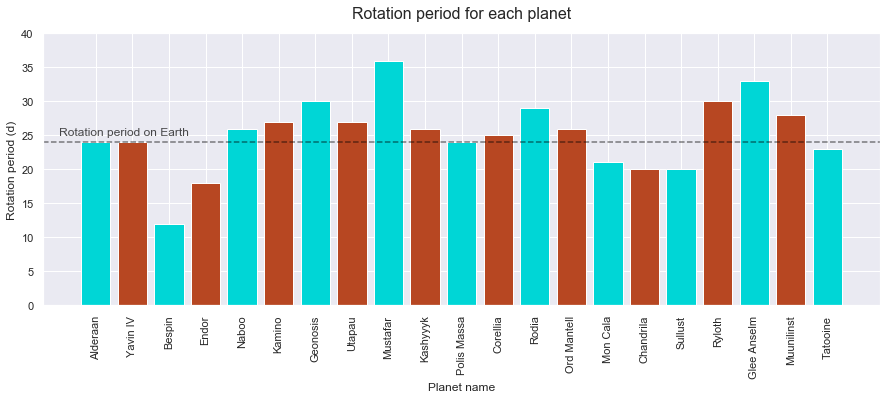

In [47]:
fig, ax = plt.subplots(figsize=(15,5))

plt.bar(
    x=df_planets['name'],
    height=df_planets['rotation_period'],
    color=['#00D6D6', '#b74722'],
)
plt.title('Rotation period for each planet', fontsize=16, pad=15)
plt.ylabel('Rotation period (d)')
plt.xlabel('Planet name')
plt.xticks(rotation=90)
plt.ylim(0, 40)
ax.axhline(y=24, linestyle='dashed', alpha=0.5, color='black')
ax.text(x=-1, y=25, s='Rotation period on Earth', alpha=0.7, color='black');

In [48]:
df_planets['rotation_period_diff'] = abs(df_planets['rotation_period'] - 24)
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,rotation_period_diff
0,Alderaan,24,364,"12,500",temperate,1 standard,"grasslands, mountains",40,"2,000,000,000",0
1,Yavin IV,24,"4,818","10,200","temperate, tropical",1 standard,"jungle, rainforests",8,"1,000",0
4,Bespin,12,"5,110","118,000",temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,"6,000,000",12
5,Endor,18,402,"4,900",temperate,0.85 standard,"forests, mountains, lakes",8,"30,000,000",6
6,Naboo,26,312,"12,120",temperate,1 standard,"grassy hills, swamps, forests, mountains",12,"4,500,000,000",2


In [52]:
#df_planets['rotation_period_diff'] = df_planets['rotation_period_diff'].apply(np.int64) # This works as well, leaving here for a learning purpose
df_planets['rotation_period_diff'] = df_planets['rotation_period_diff'].astype('int64')
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,rotation_period_diff
0,Alderaan,24,364,"12,500",temperate,1 standard,"grasslands, mountains",40,"2,000,000,000",0
1,Yavin IV,24,"4,818","10,200","temperate, tropical",1 standard,"jungle, rainforests",8,"1,000",0
4,Bespin,12,"5,110","118,000",temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,"6,000,000",12
5,Endor,18,402,"4,900",temperate,0.85 standard,"forests, mountains, lakes",8,"30,000,000",6
6,Naboo,26,312,"12,120",temperate,1 standard,"grassy hills, swamps, forests, mountains",12,"4,500,000,000",2


In [53]:
df_planets.dtypes

name                     object
rotation_period         float64
orbital_period          float64
diameter                float64
climate                  object
gravity                  object
terrain                  object
surface_water           float64
population              float64
rotation_period_diff      int64
dtype: object

In [51]:
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,rotation_period_diff
0,Alderaan,24,364,"12,500",temperate,1 standard,"grasslands, mountains",40,"2,000,000,000",0
1,Yavin IV,24,"4,818","10,200","temperate, tropical",1 standard,"jungle, rainforests",8,"1,000",0
4,Bespin,12,"5,110","118,000",temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,"6,000,000",12
5,Endor,18,402,"4,900",temperate,0.85 standard,"forests, mountains, lakes",8,"30,000,000",6
6,Naboo,26,312,"12,120",temperate,1 standard,"grassy hills, swamps, forests, mountains",12,"4,500,000,000",2


In [23]:
print(min(df_planets['rotation_period_diff']))

0


In [24]:
12/10

1.2

In [25]:
df_planets.dtypes

name                     object
rotation_period         float64
orbital_period          float64
diameter                float64
climate                  object
gravity                  object
terrain                  object
surface_water           float64
population              float64
rotation_period_diff      int64
dtype: object

In [60]:
print(0.0)
print(1.2*1)
print(1.2*2)
print(1.2*3)
print(1.2*4)
print(1.2*5)
print(1.2*6)
print(1.2*7)
print(1.2*8)
print(1.2*9)
print(1.2*10)

0.0
1.2
2.4
3.5999999999999996
4.8
6.0
7.199999999999999
8.4
9.6
10.799999999999999
12.0


In [74]:
df_planets['rotation_period_diff'].unique()

array([ 0, 12,  6,  2,  3,  1,  5,  4,  9])

In [78]:
df_planets['rotation_period_pkt'] = df_planets['rotation_period_diff'].apply(lambda x: 10 if x in (0,1) else
                                                                       9 if x == 2 else
                                                                       8 if x == 3 else
                                                                       7 if x == 4 else
                                                                       6 if x == 5 else
                                                                       5 if x == 6 else
                                                                       3 if x == 9 else
                                                                       1)

In [79]:
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,rotation_period_diff,rotation_period_pkt
0,Alderaan,24,364,"12,500",temperate,1 standard,"grasslands, mountains",40,"2,000,000,000",0,10
1,Yavin IV,24,"4,818","10,200","temperate, tropical",1 standard,"jungle, rainforests",8,"1,000",0,10
4,Bespin,12,"5,110","118,000",temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,"6,000,000",12,1
5,Endor,18,402,"4,900",temperate,0.85 standard,"forests, mountains, lakes",8,"30,000,000",6,5
6,Naboo,26,312,"12,120",temperate,1 standard,"grassy hills, swamps, forests, mountains",12,"4,500,000,000",2,9


In [80]:
df_planets['rotation_period_pkt'].unique()

array([10,  1,  5,  9,  8,  6,  7,  3])

In [82]:
print(max(df_planets['orbital_period']))

5110.0


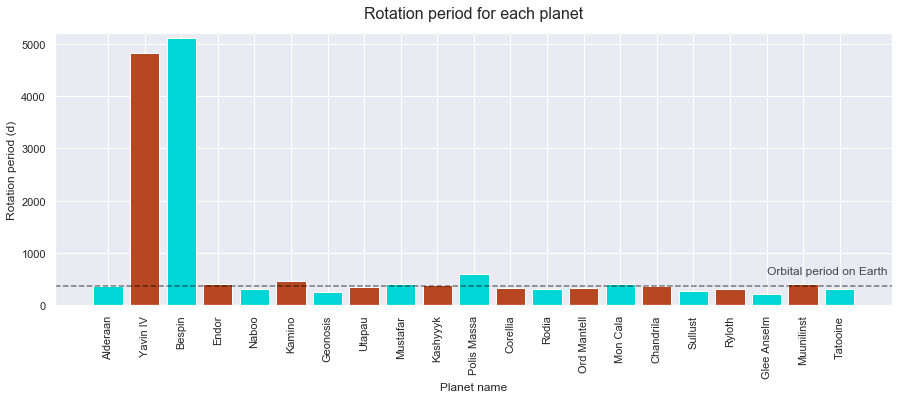

In [95]:
fig, ax = plt.subplots(figsize=(15,5))

plt.bar(
    x=df_planets['name'],
    height=df_planets['orbital_period'],
    color=['#00D6D6', '#b74722'],
)
plt.title('Orbital period for each planet', fontsize=16, pad=15)
plt.ylabel('Orbital period (d)')
plt.xlabel('Planet name')
plt.xticks(rotation=90)
plt.ylim(0, 5200)
ax.axhline(y=365, linestyle='dashed', alpha=0.5, color='black')
ax.text(x=18, y=600, s='Orbital period on Earth', alpha=0.7, color='black');

In [96]:
df_planets['orbital_period_diff'] = abs(df_planets['orbital_period'] - 365)
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,rotation_period_diff,rotation_period_pkt,orbital_period_diff
0,Alderaan,24,364,"12,500",temperate,1 standard,"grasslands, mountains",40,"2,000,000,000",0,10,1
1,Yavin IV,24,"4,818","10,200","temperate, tropical",1 standard,"jungle, rainforests",8,"1,000",0,10,"4,453"
4,Bespin,12,"5,110","118,000",temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,"6,000,000",12,1,"4,745"
5,Endor,18,402,"4,900",temperate,0.85 standard,"forests, mountains, lakes",8,"30,000,000",6,5,37
6,Naboo,26,312,"12,120",temperate,1 standard,"grassy hills, swamps, forests, mountains",12,"4,500,000,000",2,9,53


In [97]:
df_planets['orbital_period_diff'].unique()

array([1.000e+00, 4.453e+03, 4.745e+03, 3.700e+01, 5.300e+01, 9.800e+01,
       1.090e+02, 1.400e+01, 4.700e+01, 1.600e+01, 2.250e+02, 3.600e+01,
       6.000e+01, 3.100e+01, 3.300e+01, 3.000e+00, 1.020e+02, 1.590e+02,
       6.100e+01])

In [98]:
print(max(df_planets['diameter']))

118000.0


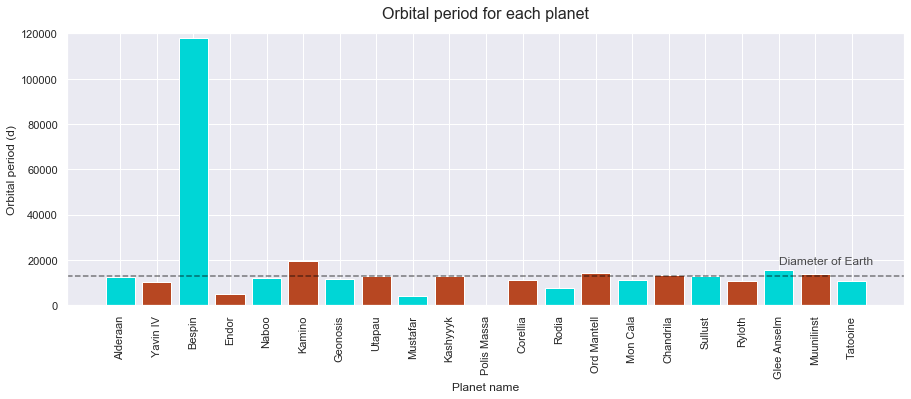

In [102]:
fig, ax = plt.subplots(figsize=(15,5))

plt.bar(
    x=df_planets['name'],
    height=df_planets['diameter'],
    color=['#00D6D6', '#b74722'],
)
plt.title('Orbital period for each planet', fontsize=16, pad=15)
plt.ylabel('Orbital period (d)')
plt.xlabel('Planet name')
plt.xticks(rotation=90)
plt.ylim(0, 120000)
ax.axhline(y=12742, linestyle='dashed', alpha=0.5, color='black')
ax.text(x=18, y=18000, s='Diameter of Earth', alpha=0.7, color='black');

In [104]:
df_planets['diameter_diff'] = abs(df_planets['diameter'] - 12742)
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,rotation_period_diff,rotation_period_pkt,orbital_period_diff,diameter_diff
0,Alderaan,24,364,"12,500",temperate,1 standard,"grasslands, mountains",40,"2,000,000,000",0,10,1,242
1,Yavin IV,24,"4,818","10,200","temperate, tropical",1 standard,"jungle, rainforests",8,"1,000",0,10,"4,453","2,542"
4,Bespin,12,"5,110","118,000",temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,"6,000,000",12,1,"4,745","105,258"
5,Endor,18,402,"4,900",temperate,0.85 standard,"forests, mountains, lakes",8,"30,000,000",6,5,37,"7,842"
6,Naboo,26,312,"12,120",temperate,1 standard,"grassy hills, swamps, forests, mountains",12,"4,500,000,000",2,9,53,622


In [105]:
df_planets['diameter_diff'].unique()

array([2.42000e+02, 2.54200e+03, 1.05258e+05, 7.84200e+03, 6.22000e+02,
       6.97800e+03, 1.37200e+03, 1.58000e+02, 8.54200e+03, 2.30000e+01,
       1.27420e+04, 1.74200e+03, 5.19300e+03, 1.30800e+03, 1.71200e+03,
       7.58000e+02, 3.80000e+01, 2.14200e+03, 2.85800e+03, 1.05800e+03,
       2.27700e+03])

In [106]:
print(max(df_planets['surface_water']))

100.0


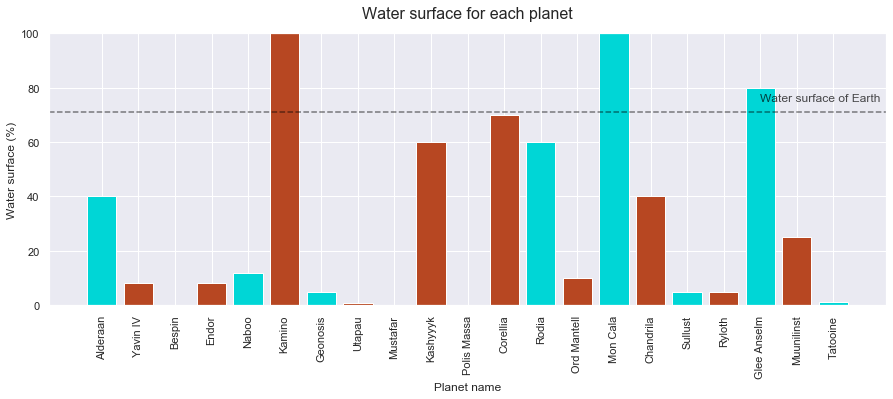

In [109]:
fig, ax = plt.subplots(figsize=(15,5))

plt.bar(
    x=df_planets['name'],
    height=df_planets['surface_water'],
    color=['#00D6D6', '#b74722'],
)
plt.title('Water surface for each planet', fontsize=16, pad=15)
plt.ylabel('Water surface (%)')
plt.xlabel('Planet name')
plt.xticks(rotation=90)
plt.ylim(0, 100)
ax.axhline(y=71, linestyle='dashed', alpha=0.5, color='black')
ax.text(x=18, y=75, s='Water surface of Earth', alpha=0.7, color='black');